In [1]:
import matplotlib.pyplot as plt
import nest
import numpy

nest.ResetKernel()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Jul 13 2025 01:06:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
nest.Install("nestml_gap_eglif_cond_alpha_multisyn_module")


Jul 15 23:29:51 Install [Info]: 
    loaded module nestml_gap_eglif_cond_alpha_multisyn_module


In [3]:
nest.resolution = 0.05

neuron = nest.Create("eglif_cond_alpha_multisyn_nestml", 2)
neuron.set({
        "V_m": -45,
        "E_L": -45,
        "C_m": 189,
        "tau_m": 11,
        "I_e": -18.101,
        "k_adap": 1.928,
        "k_1": 0.191,
        "k_2": 0.090909,

        # V Threshold, Refractory Period and Escape rate
        "V_th": -35,
        "t_ref": 1,
        "tau_V": 0.8,
        "lambda_0": 1.2,

        # Reset on Spike
        "V_reset": -45,
        "A1": 1810.923,
        "A2": 1358.197,

        # Postsynaptic receptor
        "tau_syn1": 1,
        "tau_syn2": 60,
        "E_rev1": 0,
        "E_rev2": -80,
        })

vm = nest.Create("voltmeter", params={"interval": 0.1})


Jul 15 23:29:51 eglif_cond_alpha_multisyn_nestml [Warning]: 
    Simulation resolution has changed. Internal state and parameters of the 
    model have been reset!

Jul 15 23:29:51 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.05 ms.


In [4]:

neuron[0].V_m = -48.0

nest.Connect(vm, neuron, "all_to_all")

In [5]:
with_gaps = True
if with_gaps:
    nest.Connect(
        neuron, neuron, 
        {"rule": "all_to_all", "allow_autapses": False}, 
        {"synapse_model": "gap_junction", "weight": 5}
    )

In [6]:
# step_current_generator = nest.Create("step_current_generator", params={"start": 500, "stop": 550, "amplitude_values":[10], "amplitude_times": [500]})
# nest.Connect(step_current_generator, neuron[0])


Jul 15 23:29:51 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Jul 15 23:29:51 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 15 23:29:51 SimulationManager::run [Info]: 
    Simulation finished.


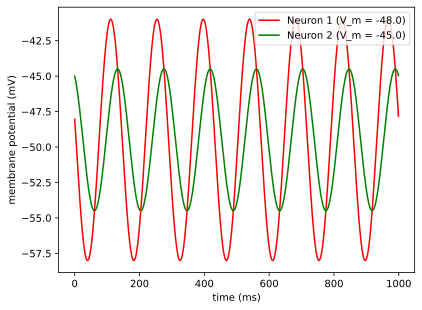

In [ ]:
nest.Simulate(1000.0)

senders = vm.events["senders"]
times = vm.events["times"]
v_m_values = vm.events["V_m"]

plt.figure(1)
plt.plot(
    times[numpy.where(senders == 1)], v_m_values[numpy.where(senders == 1)], "r-",
    label="Neuron 1 (V_m = -48.0)")
plt.plot(
    times[numpy.where(senders == 2)], v_m_values[numpy.where(senders == 2)], "g-", label="Neuron 2 (V_m = -45.0)")
plt.legend(loc='upper right')
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")
plt.savefig("test.png")
plt.show()


